<a href="https://colab.research.google.com/github/shehadeh7/APS360-Project/blob/main/1D_conv/github_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [2]:
import tensorflow as tf
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
!unzip github_fork_data.zip

Archive:  github_fork_data.zip
  inflating: x_data.npy              
  inflating: y_data.npy              


In [4]:
# load X and Y from npy files
x_path = './x_data.npy'
y_path = './y_data.npy'
X = np.load(x_path)
Y = np.load(y_path)

print(X.shape)
print(Y.shape)

(3876, 40)
(3876,)


In [5]:
X_train_0, X_test, y_train_0, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_0, y_train_0, test_size=0.18, random_state=42) # 0.18 x 0.85 = 0.15

In [6]:
print(X_train.shape, X_val.shape, X_test.shape)

(2701, 40) (593, 40) (582, 40)


In [7]:
# count occurences of each emotion
train_count = [0]*6
val_count = [0]*6
test_count = [0]*6

for e in y_train:
    train_count[e] += 1

for e in y_val:
    val_count[e] += 1

for e in y_test:
    test_count[e] += 1

print(train_count, val_count, test_count)

[448, 459, 457, 457, 454, 426] [111, 94, 97, 90, 97, 104] [93, 99, 98, 105, 101, 86]


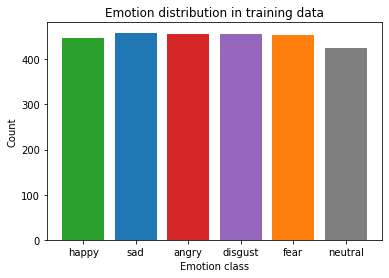

In [8]:
from matplotlib import pyplot

fig = plt.figure()
c = ['tab:green', 'tab:blue', 'tab:red', 'tab:purple', 'tab:orange', 'tab:gray']

emos = ['happy', 'sad', 'angry', 'disgust', 'fear', 'neutral']
plt.bar(emos, train_count, color=c)
plt.xlabel("Emotion class")
plt.ylabel("Count")
plt.title("Emotion distribution in training data")
plt.show()

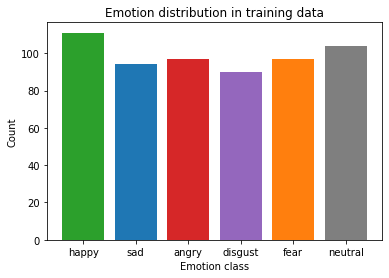

In [11]:
from matplotlib import pyplot

fig = plt.figure()
c = ['tab:green', 'tab:blue', 'tab:red', 'tab:purple', 'tab:orange', 'tab:gray']

emos = ['happy', 'sad', 'angry', 'disgust', 'fear', 'neutral']
plt.bar(emos, val_count, color=c)
plt.xlabel("Emotion class")
plt.ylabel("Count")
plt.title("Emotion distribution in validation data")
plt.show()

In [9]:
#####################################################
#                 Model Section                     #
#####################################################

x_traincnn = np.expand_dims(X_train, axis=2)
x_valcnn = np.expand_dims(X_val, axis=2)

print(x_traincnn.shape, x_valcnn.shape)

model = Sequential()
model.add(Conv1D(64, 5, padding='same',
                    input_shape=(40, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(6))
model.add(Activation('softmax'))

print(model.summary)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

history = model.fit(x_traincnn, y_train,
                        batch_size=16, epochs=50,
                        validation_data=(x_valcnn, y_val))

(2701, 40, 1) (593, 40, 1)
<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f67b974f350>>
Epoch 1/50
169/169 [==============================] - 1s 4ms/step - loss: 3.5816 - accuracy: 0.5217 - val_loss: 1.6621 - val_accuracy: 0.6678
Epoch 2/50
169/169 [==============================] - 1s 3ms/step - loss: 1.6327 - accuracy: 0.6698 - val_loss: 1.0567 - val_accuracy: 0.6965
Epoch 3/50
169/169 [==============================] - 1s 3ms/step - loss: 1.0380 - accuracy: 0.7116 - val_loss: 0.8217 - val_accuracy: 0.7369
Epoch 4/50
169/169 [==============================] - 1s 4ms/step - loss: 0.7937 - accuracy: 0.7386 - val_loss: 0.8872 - val_accuracy: 0.7420
Epoch 5/50
169/169 [==============================] - 1s 3ms/step - loss: 0.6556 - accuracy: 0.7723 - val_loss: 0.6888 - val_accuracy: 0.7589
Epoch 6/50
169/169 [==============================] - 1s 3ms/step - loss: 0.5978 - accuracy: 0.7864 - val_loss: 0.6551 - val_accuracy: 0.7690
Epoch 7/50
169/169 [=======

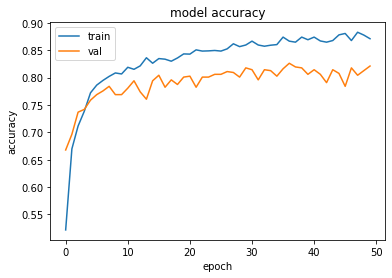

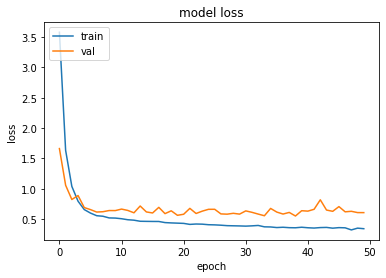

In [10]:
# Model plots
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()